## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests      
import time 
from bs4 import BeautifulSoup

In [2]:
array = [0, 10, 100]
sigma = 1

In [15]:
x = np.linspace(1, 10, 100)
(x/sigma**2) * np.exp(-x**2 / (2 * sigma**2))

array([6.06530660e-01, 6.01679754e-01, 5.87844382e-01, 5.66229787e-01,
       5.38161199e-01, 5.05019725e-01, 4.68182639e-01, 4.28970773e-01,
       3.88605017e-01, 3.48173082e-01, 3.08606930e-01, 2.70670566e-01,
       2.34957303e-01, 2.01895159e-01, 1.71758806e-01, 1.44686324e-01,
       1.20699040e-01, 9.97228756e-02, 8.16097895e-02, 6.61582185e-02,
       5.31316518e-02, 4.22747910e-02, 3.33269896e-02, 2.60328975e-02,
       2.01504092e-02, 1.54561509e-02, 1.17488237e-02, 8.85076607e-03,
       6.60811002e-03, 4.88988709e-03, 3.58640777e-03, 2.60719108e-03,
       1.87867033e-03, 1.34185051e-03, 9.50044837e-04, 6.66776581e-04,
       4.63897542e-04, 3.19946930e-04, 2.18754037e-04, 1.48273683e-04,
       9.96343549e-05, 6.63739915e-05, 4.38366043e-05, 2.87033131e-05,
       1.86332659e-05, 1.19925940e-05, 7.65260963e-06, 4.84153515e-06,
       3.03695451e-06, 1.88877182e-06, 1.16469132e-06, 7.12092222e-07,
       4.31677527e-07, 2.59468112e-07, 1.54636956e-07, 9.13798785e-08,
      

In [16]:
def R_dist(array, sigma):
    l, r, n = array
    x = np.linspace(l, r, n)
    y = (x/sigma**2) * np.exp(-x**2 / (2 * sigma**2))
    plt.plot(x, y)
    plt.show()

In [22]:
m = np.random.randint(1, 6, (3,3))
m

array([[5, 3, 3],
       [3, 1, 2],
       [2, 3, 5]])

In [23]:
def diag_mul(m):
    m_size = len(m)
    diag = 1
    for i in range(m_size):
        diag *= m[i, i]
    for i in range(m_size):
        for j in range(m_size):
            m[i, j] *= diag
    return m

In [24]:
diag_mul(m)

array([[125,  75,  75],
       [ 75,  25,  50],
       [ 50,  75, 125]])

In [5]:
x = np.random.normal(0, 1, size=10000)

In [7]:
k = np.random.choice(x, size=(10000,9000))

In [12]:
np.mean(k)

0.009709085016574418

1.6573703208378665

In [21]:
x = np.linspace(-100, 100, 100010)

In [23]:
f = np.exp(x - (x ** 2) / 2)

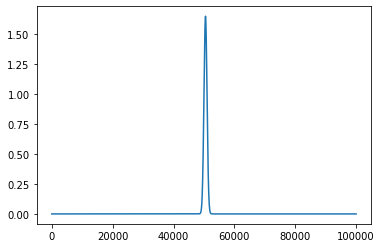

In [24]:
plt.plot(f)
None

In [ ]:
def my_vander(x, n):
    x = np.array(x)
    matrix = [x**(n - 1 - i) for i in range(n)]
    return np.array([*zip(*matrix)])

In [ ]:
my_vander([1, 2, 3, 4, 5], 5)

In [ ]:
 assert np.all(my_vander([1, 2, 3, 4, 5], 5) == np.vander([1, 2, 3, 4, 5], 5))

In [ ]:
 assert np.all(my_vander([1, 1, 1, 1, 1], 4) == np.vander([1, 1, 1, 1, 1], 4))

In [ ]:
 assert np.all(my_vander([3, 21, 1, 91, 31], 3) == np.vander([3, 21, 1, 91, 31], 3))

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

In [ ]:
def maraphon_task1(n):
    vini = np.random.exponential(1, size=10000)
    pig = np.random.normal(1, 1, size=10000)
    rabbit = np.random.poisson(1, size=10000)
    ia_ia = 2 * np.random.binomial(1, 0.5, size=10000)
    if n==1:
        return [np.vstack((vini, pig, rabbit, ia_ia))]
    elif n>1:
        p = [np.vstack((vini, pig, rabbit, ia_ia))]
        return np.vstack((p, maraphon_task1(n-1)))

In [ ]:
maraphon_task1(100)[0: 4]

In [ ]:
results = np.transpose(np.sum(maraphon_task1(10), axis=0))

In [ ]:
results

In [ ]:
def unfold(x):
    if len(x)==1:
        return x[0]
    elif len(x)==2:
        ean = np.random.binomial(1, 0.5, 1) + 2
        return ean[0]

In [ ]:
winners = [*map(lambda x: [*np.where(x==max(x))[0]], results)]

In [ ]:
winners[0: 12]

In [ ]:
unfolded_winner = np.array([*map(lambda x: unfold(x), winners)])

In [ ]:
unfolded_winner[0: 15]

In [ ]:
sns.distplot(unfolded_winner[unfolded_winner==0], bins=1, kde=False, color='g')
sns.distplot(unfolded_winner[unfolded_winner==1], bins=1, kde=False, color='b')
sns.distplot(unfolded_winner[unfolded_winner==2], bins=1, kde=False, color='y')
sns.distplot(unfolded_winner[unfolded_winner==3], bins=1, kde=False, color='r')
plt.title('Распределение победителей марафона')
plt.legend(labels=['Вини-Пух', 'Питачок', 'Кролик', 'Ослик Иа-Иа'], loc=4)
plt.show()

Теперь объединим участников в команды 

In [ ]:
def maraphon_task2(n):
    vini = np.random.exponential(1, size=10000)
    pig = np.random.normal(1, 1, size=10000)
    rabbit = np.random.poisson(1, size=10000)
    ia_ia = 2 * np.random.binomial(1, 0.5, size=10000)
    vini_pig = vini + pig
    rabbit_ia_ia = rabbit + ia_ia
    if n==1:
        return [np.vstack((vini_pig, rabbit_ia_ia))]
    elif n>1:
        p = [np.vstack((vini_pig, rabbit_ia_ia))]
        return np.vstack((p, maraphon_task2(n-1)))

In [ ]:
results_2 = np.transpose(np.sum(maraphon_task2(10), axis=0))
winners_2 = [*map(lambda x: [*np.where(x==max(x))[0]], results_2)]
unfolded_winner_2 = np.array([*map(lambda x: unfold(x), winners_2)])

In [ ]:
winners_2[0: 10]

In [ ]:
sns.distplot(unfolded_winner_2[unfolded_winner_2==0], bins=1, kde=False, color='g')
sns.distplot(unfolded_winner_2[unfolded_winner_2==1], bins=1, kde=False, color='r')
plt.title('Распределение победителей  командного марафона')
plt.legend(labels=['Вини-Пух и Питачок', 'Кролик и Ослик Иа-Иа'], loc=4)
plt.show()

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [ ]:
def parse_page(search, page):
    url = f'https://www.avito.ru/moskva?q={search}&p={page}'
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    items = tree.find_all('div', {'class' : 'snippet-horizontal'})
    item_list = []
    for item in items:
        if item.find('span', {'class': 'item-address-georeferences-item__content'}) is None:
            udg = np.NaN
        else:
            udg = item.find('span', {'class': 'item-address-georeferences-item__content'}).text
        if item.find('span', {'class': 'item-address-georeferences-item__after'}) is None:
            dist = np.NaN
        else:
            dist = item.find('span', {'class': 'item-address-georeferences-item__after'}).text
        item_list.append({'Title': item.h3.a.get('title'),
                     'Weblink': item.h3.a.get('href'),
                     'Price in ₽': item.find('span', {'class': 'snippet-price'}).text.strip('₽ \n'), 
                     'Underground Station': udg, 
                     'Distance to the Station': dist})
    return pd.DataFrame(item_list)

In [ ]:
df = parse_page('iphone', 5)
df.head()

## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [2]:
walmart = pd.read_csv('walmart.csv')
walmart['Date'] = pd.to_datetime(walmart.Date)
walmart.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [8]:
walmart.shape[0]

418239

In [ ]:
walmart.tail()

In [ ]:
walmart.info()

In [ ]:
columns = ['Store' , 'Date', 'Dept','Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price' , 'MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4', 'MarkDown5', 'CPI',	'Unemployment']
emptiness = {}
for column in columns:
    emptiness[column] = 100 * walmart[column].isnull().sum() / 418239  
emptiness

In [ ]:
walmart.drop([ 'MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4', 'MarkDown5'], axis='columns', inplace=True)
walmart.head()

In [ ]:
walmart['Store'].min(), walmart['Store'].max(), len(set(walmart['Store'])) # всего 45 магазинов

In [ ]:
walmart['Dept'].min(), walmart['Dept'].max(), len(set(walmart['Dept'])) # всего отделов 81, какие-то отделы пропущены 

In [ ]:
walmart['Date'].min(), walmart['Date'].max()

In [ ]:
df = walmart[['Date', 'Weekly_Sales']]
per = df.Date.dt.to_period("M")
df = df.groupby(per)
df_grouped = df['Weekly_Sales'].agg(np.sum)

In [ ]:
new = pd.DataFrame(df_grouped)
new.columns = ['Sales']

In [ ]:
new.head()

In [ ]:
new.plot()

In [ ]:
values = walmart[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
values

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 10)
sns.heatmap(values.corr(), annot = True,  cbar=False, )
plt.show()

In [ ]:
stores = walmart[['Store', 'Weekly_Sales']].groupby('Store')
stores_grouped = stores['Weekly_Sales'].agg(np.sum)
stores_grouped.sort_values(ascending=False).head()

In [ ]:
shops = [20, 4, 14, 13, 2]

In [ ]:
new_df = walmart[['Store', 'Date', 'Weekly_Sales']]

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
for shop in shops:
    p = new_df[new_df['Store']==shop].groupby('Date')
    pp = p['Weekly_Sales'].agg(np.sum)
    pp.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(labels=['Dept 20', ' Dept4', ' Dept 14', 'Dept 13', 'Dept 2'])

In [ ]:
walmart['Year'] = pd.DatetimeIndex(walmart['Date']).year
df_sorted = walmart[(walmart['Year']==2011) & (walmart['Type']=='A')]
df_sorted[0: 5]

In [ ]:
grop = df_sorted[['Dept', 'Weekly_Sales']].groupby('Dept')
grouped = grop['Weekly_Sales'].agg(np.sum)
gist = pd.DataFrame(grouped.sort_values(ascending=False).head(10))

In [ ]:
gist

In [ ]:
gist.plot.bar()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [ ]:
def get_group_members(group_id, offset, token):
    url = f"https://api.vk.com/method/groups.getMembers?group_id={group_id}&v=5.22&offset={offset}&count=1000&fields=bdate&access_token={token}"
    response = requests.get(url) 
    return response.json()

In [ ]:
group_id = '63731512'
with open('my_token.txt') as f:
    token = f.read().rstrip()
offset = 100

In [ ]:
wall = get_group_members(group_id, offset, token)

In [ ]:
import time
members = [ ] 
for offset in range(0, 10000, 1000):  
    time.sleep(0.4) 

    wall = get_group_members(group_id, offset, token)
    members.extend([item for item in wall['response']['items']])
ddf = pd.DataFrame(members)

In [ ]:
ddf.drop(['first_name',	'last_name',	'deactivated'], axis='columns', inplace=True)
ddf['bdate'] = pd.to_datetime(ddf['bdate'], errors='coerce')
ddf = ddf.dropna(subset=['bdate'])

In [ ]:
ddf

In [ ]:
ddf['month'] = pd.DatetimeIndex(ddf['bdate']).month

In [ ]:
ddf

In [ ]:
people = ddf[['month', 'id']].groupby('month')
people_grouped = people['id'].agg('count')

In [ ]:
people_grouped.plot.bar() # примерно равномерно 

In [ ]:
ddf.loc[10: 20]

In [ ]:
count = 0
for i in range(0, 500000):
    p = ddf.sample(50) 
    k = p[['bdate', 'id']].groupby('bdate')
    k_grouped = people['id'].agg('count')
    if  k_grouped[k_grouped > 1].count() > 0:
        count += 1
prob = count / 500000
prob

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')

In [11]:
n = np.random.normal(0, 1, 100000)


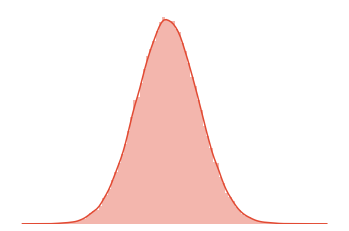

In [21]:
sns.distplot(n, bins=90)
plt.axis('off')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

In [14]:
x = -0.5
odd = 0.7 + 3 * x

In [15]:
sigma(odd)

0.31002551887238755

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')